In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#### Topic: Predict the 2018 Finishers Boston Marathon

In [5]:
# Motivation:
## 1. Is there specific age, gender and country that able to finish Boston marathon?
## 2. Who will be the top 3 finishers of 2018 Boston marathon statistically by age, gender and country?

In [6]:
## Feedback:
### create a decision tree model to predict whether  a runner will finish the race.
### identify the target column. 
### check if the target column has class imbalance, if yes, please use smote-tomek to re-balance the dataset.

In [7]:
### Project4 - Part 2: Brief
### Perform EDA on your dataset:
#### 1. Statistical analysis, along with any visualizations.
#### 2. Determine how to handle sampling or missing values.
#### 3. Clearly identify shortcomings, assumptions, and next steps.

In [8]:
# read 2015 marathon results
marathon = pd.read_csv("data/marathon_results_2015.csv")
marathon.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [9]:
# Check the number of rows and columns.
marathon.shape

(26598, 25)

In [10]:
# Check the data type of each column.
marathon.dtypes

Unnamed: 0        int64
Bib              object
Name             object
Age               int64
M/F              object
City             object
State            object
Country          object
Citizen          object
Unnamed: 9       object
5K               object
10K              object
15K              object
20K              object
Half             object
25K              object
30K              object
35K              object
40K              object
Pace             object
Proj Time        object
Official Time    object
Overall           int64
Gender            int64
Division          int64
dtype: object

In [11]:
# read 2016 marathon results
marathon = pd.read_csv("data/marathon_results_2016.csv")
marathon.head()

,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 8,5K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,5,"Hayle, Lemi Berhanu",21,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:04,2:12:45,2:12:45,1,1,1
1,1,"Desisa, Lelisa",26,M,Ambo,NaN,ETH,NaN,NaN,0:15:47,...,1:19:15,1:34:17,1:50:24,2:05:59,0:05:06,2:13:32,2:13:32,2,2,2
2,6,"Tsegay, Yemane Adhane",31,M,Addis Ababa,NaN,ETH,NaN,NaN,0:15:46,...,1:19:15,1:34:45,1:50:48,2:06:47,0:05:07,2:14:02,2:14:02,3,3,3
3,11,"Korir, Wesley",33,M,Kitale,NaN,KEN,NaN,NaN,0:15:46,...,1:19:16,1:34:45,1:50:48,2:06:47,0:05:07,2:14:05,2:14:05,4,4,4
4,14,"Lonyangata, Paul",23,M,Eldoret,NaN,KEN,NaN,NaN,0:15:46,...,1:19:18,1:34:46,1:51:30,2:08:11,0:05:11,2:15:45,2:15:45,5,5,5


In [12]:
# Check the number of rows and columns.
marathon.shape

(26630, 24)

In [13]:
# Check the data type of each column.
marathon.dtypes

Bib              object
Name             object
Age               int64
M/F              object
City             object
State            object
Country          object
Citizen          object
Unnamed: 8       object
5K               object
10K              object
15K              object
20K              object
Half             object
25K              object
30K              object
35K              object
40K              object
Pace             object
Proj Time        object
Official Time    object
Overall           int64
Gender            int64
Division          int64
dtype: object

In [14]:
# read 2017 marathon results
marathon = pd.read_csv("data/marathon_results_2017.csv")
marathon.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


In [15]:
# Check the number of rows and columns.
marathon.shape

(26410, 25)

In [16]:
# Check the data type of each column.
marathon.dtypes

Unnamed: 0        int64
Bib              object
Name             object
Age               int64
M/F              object
City             object
State            object
Country          object
Citizen          object
Unnamed: 9       object
5K               object
10K              object
15K              object
20K              object
Half             object
25K              object
30K              object
35K              object
40K              object
Pace             object
Proj Time        object
Official Time    object
Overall           int64
Gender            int64
Division          int64
dtype: object

In [17]:
# Updated : 29th Sept 2018

In [20]:
marathon.isnull().sum()

Unnamed: 0           0
Bib                  0
Name                 0
Age                  0
M/F                  0
City                 0
State             3595
Country              0
Citizen          25156
Unnamed: 9       26319
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
dtype: int64

In [21]:
print(marathon.keys())

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')


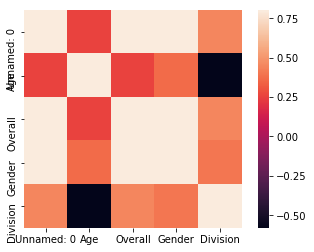

In [26]:
import seaborn as sns
corrmat = marathon.corr()

sns.heatmap(corrmat, vmax=.8, square=True);

In [27]:
marathon.tail()            # print the last 5 rows

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
26405,26405,25166,"Steinbach, Paula Eyvonne",61,F,Ontario,CA,USA,NaN,MI,...,4:12:06,5:03:08,5:55:18,6:46:57,0:16:24,-,7:09:39,26407,11972,344
26406,26406,25178,"Avelino, Andrew R.",25,M,Fayetteville,NC,USA,NaN,MI,...,3:50:19,4:50:01,5:53:48,6:54:21,0:16:40,-,7:16:59,26408,14436,4774
26407,26407,27086,"Hantel, Johanna",57,F,Malvern,PA,USA,NaN,NaN,...,4:15:21,5:06:37,6:00:33,6:54:38,0:16:47,-,7:19:37,26409,11973,698
26408,26408,25268,"Reilly, Bill",64,M,New York,NY,USA,NaN,MI,...,4:06:10,5:07:09,6:06:07,6:56:08,0:16:49,-,7:20:44,26410,14437,1043
26409,26409,25266,"Rigsby, Scott",48,M,Alpharetta,GA,USA,NaN,MI,...,4:27:14,5:37:13,6:39:07,7:41:23,0:18:15,-,7:58:14,26411,14438,2553


In [29]:
marathon.index

RangeIndex(start=0, stop=26410, step=1)

In [30]:
marathon.values

array([[0, '11', 'Kirui, Geoffrey', ..., 1, 1, 1],
       [1, '17', 'Rupp, Galen', ..., 2, 2, 2],
       [2, '23', 'Osako, Suguru', ..., 3, 3, 3],
       ...,
       [26407, '27086', 'Hantel, Johanna', ..., 26409, 11973, 698],
       [26408, '25268', 'Reilly, Bill', ..., 26410, 14437, 1043],
       [26409, '25266', 'Rigsby, Scott', ..., 26411, 14438, 2553]],
      dtype=object)

In [31]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 25 columns):
Unnamed: 0       26410 non-null int64
Bib              26410 non-null object
Name             26410 non-null object
Age              26410 non-null int64
M/F              26410 non-null object
City             26410 non-null object
State            22815 non-null object
Country          26410 non-null object
Citizen          1254 non-null object
Unnamed: 9       91 non-null object
5K               26410 non-null object
10K              26410 non-null object
15K              26410 non-null object
20K              26410 non-null object
Half             26410 non-null object
25K              26410 non-null object
30K              26410 non-null object
35K              26410 non-null object
40K              26410 non-null object
Pace             26410 non-null object
Proj Time        26410 non-null object
Official Time    26410 non-null object
Overall          26410 non-null int64
G

In [33]:
# marathon['gender']
# changed column name from M/F into Gender

In [38]:
marathon.rename(columns={'M/F': 'Gender'}, inplace=True)
marathon

,Unnamed: 0,Bib,Name,Age,Gender,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5
5,5,15,"Abdirahman, Abdi",40,M,Phoenix,AZ,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:52,2:05:21,0:05:04,-,2:12:45,6,6,1
6,6,63,"Maiyo, Augustus K.",33,M,Colorado Springs,CO,USA,NaN,NaN,...,1:17:00,1:33:01,1:49:06,2:05:41,0:05:05,-,2:13:16,7,7,6
7,7,7,"Sefir, Dino",28,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:18:36,1:34:52,1:51:11,2:07:09,0:05:08,-,2:14:26,8,8,7
8,8,18,"Puskedra, Luke",27,M,Eugene,OR,USA,NaN,NaN,...,1:17:26,1:34:05,1:50:53,2:07:17,0:05:09,-,2:14:45,9,9,8
9,9,20,"Ward, Jared",28,M,Kaysville,UT,USA,NaN,NaN,...,1:17:17,1:33:49,1:50:44,2:07:54,0:05:11,-,2:15:28,10,10,9


In [39]:
marathon.describe()

,Unnamed: 0,Age,Overall,Gender,Division
count,26410.000000,26410.000000,26410.000000,26410.000000,26410.000000
mean,13204.500000,42.587732,13206.260091,6660.973230,1588.796706
std,7624.054641,11.419467,7624.370496,3910.031525,1423.199500
min,0.000000,18.000000,1.000000,1.000000,1.000000
25%,6602.250000,34.000000,6604.250000,3302.250000,502.000000
50%,13204.500000,43.000000,13206.500000,6603.500000,1154.000000
75%,19806.750000,51.000000,19808.750000,9904.750000,2190.750000
max,26409.000000,84.000000,26411.000000,14438.000000,5846.000000


In [40]:
marathon.describe(include=['object'])

,Bib,Name,Gender,City,State,Country,Citizen,Unnamed: 9,5K,10K,15K,20K,Half,25K,30K,35K,40K,Pace,Proj Time,Official Time
count,26410,26410,26410,26410,22815,26410,1254,91,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410,26410
unique,26410,26365,2,5926,68,91,85,2,1327,2475,3597,4719,4921,5808,6916,7999,8944,561,1,9269
top,12861,"Hall, Matt",M,Boston,MA,USA,GBR,VI,0:24:38,-,1:13:50,-,1:44:55,-,-,-,3:32:23,0:08:43,-,3:51:18
freq,1,2,14438,702,4586,20945,141,54,69,54,29,33,26,40,25,23,14,157,26410,13


In [41]:
marathon.describe(include='all')

,Unnamed: 0,Bib,Name,Age,Gender,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
count,26410.000000,26410,26410,26410.000000,26410,26410,22815,26410,1254,91,...,26410,26410,26410,26410,26410,26410,26410,26410.000000,26410.000000,26410.000000
unique,NaN,26410,26365,NaN,2,5926,68,91,85,2,...,5808,6916,7999,8944,561,1,9269,NaN,NaN,NaN
top,NaN,12861,"Hall, Matt",NaN,M,Boston,MA,USA,GBR,VI,...,-,-,-,3:32:23,0:08:43,-,3:51:18,NaN,NaN,NaN
freq,NaN,1,2,NaN,14438,702,4586,20945,141,54,...,40,25,23,14,157,26410,13,NaN,NaN,NaN
mean,13204.500000,NaN,NaN,42.587732,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13206.260091,6660.973230,1588.796706
std,7624.054641,NaN,NaN,11.419467,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7624.370496,3910.031525,1423.199500
min,0.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000
25%,6602.250000,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6604.250000,3302.250000,502.000000
50%,13204.500000,NaN,NaN,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13206.500000,6603.500000,1154.000000
75%,19806.750000,NaN,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19808.750000,9904.750000,2190.750000


In [43]:
marathon.Gender.describe()

,Gender
count,26410.000000
mean,6660.973230
std,3910.031525
min,1.000000
25%,3302.250000
50%,6603.500000
75%,9904.750000
max,14438.000000


In [45]:
marathon.Age.mean()

42.587731919727375

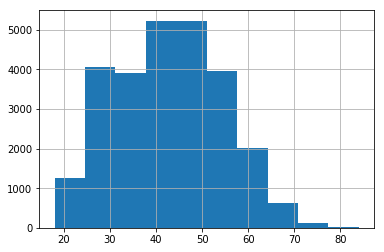

In [46]:
marathon.Age.hist();

In [55]:
marathon.Age.value_counts()

45    1127
46     976
40     926
47     843
50     815
41     801
35     800
48     784
42     758
36     733
39     712
43     706
37     687
49     686
55     682
38     670
51     658
44     651
52     638
29     636
30     629
33     591
28     590
31     583
53     573
27     571
32     563
26     557
34     540
56     504
      ... 
58     345
23     307
59     284
62     271
22     210
65     187
63     157
21     147
66     137
64     117
67     100
20      83
70      78
68      67
69      47
19      43
71      25
73      22
18      20
72      19
74      17
75      15
76      10
77       5
78       4
80       3
79       3
81       2
83       1
84       1
Name: Age, Length: 66, dtype: int64

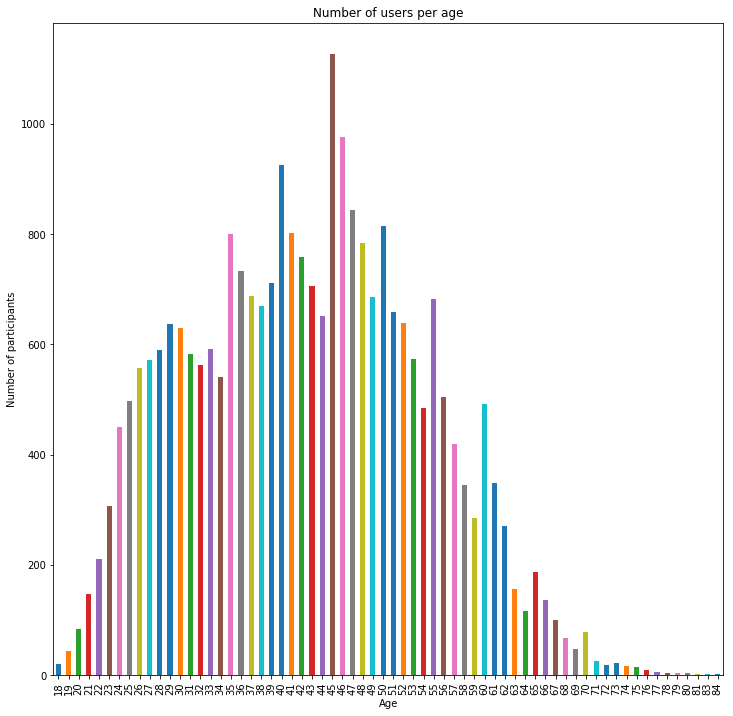

In [61]:
marathon.Age.value_counts().sort_index().plot(kind='bar', figsize=(12,12));
plt.xlabel('Age');
plt.ylabel('Number of participants');
plt.title('Number of users per age');

In [62]:
young_runners = marathon.Age < 20
young_runners

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
26380    False
26381    False
26382    False
26383    False
26384     True
26385    False
26386    False
26387    False
26388    False
26389    False
26390    False
26391    False
26392    False
26393    False
26394    False
26395    False
26396    False
26397    False
26398    False
26399    False
26400    False
26401    False
26402    False
26403    False
26404     True
26405    False
26406    False
26407    False
26408    False
26409    False
Name: Age, Length: 26410, dtype: bool

In [63]:
marathon[young_runners]

,Unnamed: 0,Bib,Name,Age,Gender,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
42,42,57,"Iwasa, Kaito",19,M,Tokyo,NaN,JPN,NaN,NaN,...,1:24:35,1:42:26,2:01:09,2:19:06,0:05:37,-,2:27:11,43,39,33
130,130,711,"Mcmillan, Erik D",19,M,Usaf Academy,CO,USA,NaN,NaN,...,1:29:28,1:48:42,2:08:36,2:28:36,0:06:00,-,2:37:15,131,115,99
202,202,902,"Caron, Patrick",19,M,Needham,MA,USA,NaN,NaN,...,1:33:25,1:53:20,2:12:31,2:32:13,0:06:08,-,2:40:45,203,181,156
471,471,2418,"Woodring, Seth T",19,M,Fort Collins,CO,USA,NaN,NaN,...,1:32:33,1:52:08,2:14:26,2:38:06,0:06:25,-,2:47:57,472,438,358
1952,1952,728,"Horn, Austin",19,M,Flagstaff,AZ,USA,NaN,NaN,...,1:45:30,2:08:27,2:32:04,2:55:07,0:07:03,-,3:04:31,1953,1813,1293
2411,2411,2829,"Armstrong, Corbin",19,M,Poquoson,VA,USA,NaN,NaN,...,1:46:09,2:08:30,2:32:11,2:56:54,0:07:10,-,3:07:43,2412,2208,1515
2524,2524,2464,"Howe, John",19,M,Usaf Academy,CO,USA,NaN,NaN,...,1:40:14,2:02:40,2:26:31,2:56:14,0:07:12,-,3:08:29,2525,2307,1564
3748,3748,5220,"Eastmond, Riley J",18,M,Lehi,UT,USA,NaN,NaN,...,1:47:24,2:09:42,2:35:47,3:03:40,0:07:27,-,3:15:20,3749,3314,2049
4084,4084,3603,"Fickes, Ben",18,M,Newark,DE,USA,NaN,NaN,...,1:50:18,2:14:30,2:39:31,3:06:22,0:07:32,-,3:17:16,4085,3579,2157
4735,4735,4496,"Moore, Ryan D",18,M,North Bend,WA,USA,NaN,NaN,...,1:48:11,2:12:15,2:38:13,3:07:00,0:07:39,-,3:20:23,4736,4062,2342


In [64]:
marathon[marathon.Age < 20]

,Unnamed: 0,Bib,Name,Age,Gender,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
42,42,57,"Iwasa, Kaito",19,M,Tokyo,NaN,JPN,NaN,NaN,...,1:24:35,1:42:26,2:01:09,2:19:06,0:05:37,-,2:27:11,43,39,33
130,130,711,"Mcmillan, Erik D",19,M,Usaf Academy,CO,USA,NaN,NaN,...,1:29:28,1:48:42,2:08:36,2:28:36,0:06:00,-,2:37:15,131,115,99
202,202,902,"Caron, Patrick",19,M,Needham,MA,USA,NaN,NaN,...,1:33:25,1:53:20,2:12:31,2:32:13,0:06:08,-,2:40:45,203,181,156
471,471,2418,"Woodring, Seth T",19,M,Fort Collins,CO,USA,NaN,NaN,...,1:32:33,1:52:08,2:14:26,2:38:06,0:06:25,-,2:47:57,472,438,358
1952,1952,728,"Horn, Austin",19,M,Flagstaff,AZ,USA,NaN,NaN,...,1:45:30,2:08:27,2:32:04,2:55:07,0:07:03,-,3:04:31,1953,1813,1293
2411,2411,2829,"Armstrong, Corbin",19,M,Poquoson,VA,USA,NaN,NaN,...,1:46:09,2:08:30,2:32:11,2:56:54,0:07:10,-,3:07:43,2412,2208,1515
2524,2524,2464,"Howe, John",19,M,Usaf Academy,CO,USA,NaN,NaN,...,1:40:14,2:02:40,2:26:31,2:56:14,0:07:12,-,3:08:29,2525,2307,1564
3748,3748,5220,"Eastmond, Riley J",18,M,Lehi,UT,USA,NaN,NaN,...,1:47:24,2:09:42,2:35:47,3:03:40,0:07:27,-,3:15:20,3749,3314,2049
4084,4084,3603,"Fickes, Ben",18,M,Newark,DE,USA,NaN,NaN,...,1:50:18,2:14:30,2:39:31,3:06:22,0:07:32,-,3:17:16,4085,3579,2157
4735,4735,4496,"Moore, Ryan D",18,M,North Bend,WA,USA,NaN,NaN,...,1:48:11,2:12:15,2:38:13,3:07:00,0:07:39,-,3:20:23,4736,4062,2342


In [65]:
marathon[marathon.Age < 20].Country

42       JPN
130      USA
202      USA
471      USA
1952     USA
2411     USA
2524     USA
3748     USA
4084     USA
4735     USA
4781     USA
4911     CAN
5443     USA
7273     USA
7377     USA
8337     USA
8432     USA
10108    USA
10465    USA
11088    USA
11233    USA
11974    USA
12207    USA
12377    USA
12441    USA
13404    USA
13725    USA
14968    USA
15919    USA
15931    USA
        ... 
18400    USA
18448    USA
18487    USA
19078    USA
20076    USA
20308    USA
20655    USA
21423    USA
21472    USA
21575    USA
21591    USA
21834    USA
22054    USA
22112    USA
22410    USA
22938    USA
23251    USA
23371    USA
24323    USA
25115    USA
25459    USA
25671    USA
25853    USA
25867    USA
26005    USA
26021    USA
26328    USA
26329    USA
26384    USA
26404    USA
Name: Country, Length: 63, dtype: object

In [73]:
# marathon[(marathon.Age < 20) & (marathon.Gender=='M')]
marathon.sort_values('Age')

,Unnamed: 0,Bib,Name,Age,Gender,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
17735,17735,26356,"Fried, Lucas A.",18,M,Wayland,MA,USA,NaN,NaN,...,2:26:58,2:56:59,3:27:37,3:57:28,0:09:33,-,4:10:23,17737,10628,3841
22938,22938,28542,"Blake, Meghan E.",18,F,Needham,MA,USA,NaN,NaN,...,2:42:12,3:17:28,3:54:05,4:31:57,0:10:59,-,4:47:48,22940,10047,4939
4735,4735,4496,"Moore, Ryan D",18,M,North Bend,WA,USA,NaN,NaN,...,1:48:11,2:12:15,2:38:13,3:07:00,0:07:39,-,3:20:23,4736,4062,2342
5443,5443,27556,"Umphrey, Duncan",18,M,Concord,MA,USA,NaN,NaN,...,1:58:19,2:23:26,2:48:35,3:13:12,0:07:47,-,3:23:44,5444,4567,2493
15919,15919,15125,"Rucker, Alyssa",18,F,Durham,NC,USA,NaN,NaN,...,2:24:39,2:53:27,3:22:06,3:49:29,0:09:13,-,4:01:22,15921,6057,3576
15931,15931,30496,"Pohl, Elizabeth S.",18,F,Weston,MA,USA,NaN,NaN,...,2:23:01,2:52:56,3:22:20,3:49:53,0:09:13,-,4:01:25,15933,6066,3582
7377,7377,4083,"Nelson, Alex",18,M,Redlands,CA,USA,NaN,NaN,...,1:53:08,2:20:45,2:50:08,3:19:35,0:08:04,-,3:31:22,7379,5773,2862
24323,24323,25291,"Tiberi, Sophia C.",18,F,Needham,MA,USA,CAN,NaN,...,2:51:20,3:33:49,4:12:11,4:50:30,0:11:41,-,5:06:07,24325,10815,5293
23251,23251,27454,"Mahoney, Tyler S.",18,F,Holliston,MA,USA,NaN,NaN,...,2:35:58,3:14:12,3:55:13,4:36:00,0:11:07,-,4:51:25,23253,10221,5012
22054,22054,27702,"Canfield, Hallie F.",18,F,Foxboro,MA,USA,NaN,NaN,...,2:33:05,3:08:42,3:44:35,4:23:35,0:10:38,-,4:38:46,22056,9561,4746


In [76]:
marathon.sort_values(['Pace', 'Age', 'Country'])

,Unnamed: 0,Bib,Name,Age,Gender,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5
5,5,15,"Abdirahman, Abdi",40,M,Phoenix,AZ,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:52,2:05:21,0:05:04,-,2:12:45,6,6,1
6,6,63,"Maiyo, Augustus K.",33,M,Colorado Springs,CO,USA,NaN,NaN,...,1:17:00,1:33:01,1:49:06,2:05:41,0:05:05,-,2:13:16,7,7,6
7,7,7,"Sefir, Dino",28,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:18:36,1:34:52,1:51:11,2:07:09,0:05:08,-,2:14:26,8,8,7
8,8,18,"Puskedra, Luke",27,M,Eugene,OR,USA,NaN,NaN,...,1:17:26,1:34:05,1:50:53,2:07:17,0:05:09,-,2:14:45,9,9,8
9,9,20,"Ward, Jared",28,M,Kaysville,UT,USA,NaN,NaN,...,1:17:17,1:33:49,1:50:44,2:07:54,0:05:11,-,2:15:28,10,10,9
